#**World Life Expectancy Analysis**
By: David Chi

##**Overview**

Many countries place value on life expectancy as it can be an indicator for success of a government and the planning it does for it’s population. The life expectancy of a country can give a bigger picture about the past, present, and future of the country and it can allow for government to plan for the future of it’s population since small changes in life expectancy can have large implications on population growth. This analysis will go over key factors that are determinants of life expectancy and see the correlation of these factors that lead to a higher or lower life expectancy.


The data in this study will come from the World Health Organization and it covers 193 countries over the course of 15 years from 2000-2015. Some of the Factors in this dataset include country status, life expectancy, adult mortality, alcohol consumption, expenditure on health, diseases,  income composition of resources, GDP, and education. This study will focus on GDP, country status, income composition of resources, and education in relation to life expectancy.


Link to data source

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?datasetId=12603




## **Key Factors**

*   **GDP** - Gross Domestic Product
*   **Total Expenditure** - Amount of money spent on health services by government.

*   **Income Composition of Resources** - A score that is based on overall health, knowledge, and standard of living.
*   **Education/Schooling** - Number of years of schooling.


*   **Status** - Represented as developed or undeveloped.
*   **Life Expectancy** - Life expectancy in age.









## **Goals**



1.   Look at the relationship between GDP and life expectancy across all countries.

2.   Look at the relationship between education and life expectancy across all countries.

3. Look at the relationship between income composition of resources and life expectancy across all countries.

4. How does life expectancy change over time?

5. Look at the relationship in life expectancy for developed V.S. developing countries.




## **Hypotheses**

1.   H0: There is no significant difference in life expectancy between countries with a higher GDP than those with lower GDP. <br /><br/>
Ha: There is a significant difference in life expectancy between countries with a higher GDP than those with lower GDP.

<br />

2.   H0: There is no significant difference in life expectancy between countries with lower education than those with higher education.<br /><br/>
Ha: There is a significant difference in life expectancy between countries with lower education than those with higher education.
<br/>

3. H0: There is no significant difference in life expectancy between countries with a higher income composition of resources than those with lower income composition of resources <br/><br/>
Ha: There is a significant difference in life expectancy between countries with a higher income composition of resources than those with lower income composition of resources.
<br/><br/>
4. H0: There is no significant difference in life expectancy between countries that are developing and developed. <br/><br/>
Ha: There is a significant difference between countries that are developed and developing.


#### Importing Data

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Check for missing values

In [ ]:
#The features with missing values

## Replace 0's with nan
df = df.replace(0, np.nan)
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(total, columns = ["Missing Values"])
missing_data

,Missing Values
Measles,983
infant deaths,848
under-five deaths,785
Population,652
percentage expenditure,611
Hepatitis B,553
GDP,448
Income composition of resources,297
Total expenditure,226
Alcohol,194


#### Fill Null Values

In [ ]:
## features with missing values
df1 = df[['Population', 'Hepatitis B', 'GDP', 'Total expenditure', 'Alcohol',
       'Schooling', ' thinness 5-9 years', ' thinness  1-19 years', 
        ' BMI ', 'Polio', 'Diphtheria ','Life expectancy ', 'Adult Mortality']]
for feature in df1:
    mean = df[feature].mean()
    std = df[feature].std()
    is_null = df[feature].isnull().sum()
    # Get random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in each feature column with random values generated
    feature_slice = df[feature].copy()
    feature_slice[np.isnan(feature_slice)] = rand_age
    df[feature] = feature_slice
df["Income composition of resources"] = df["Income composition of resources"].fillna(df["Income composition of resources"].mean())
##Check if any column still contain missing values

df[feature].isnull().sum()

0

#### Distribution of Factors

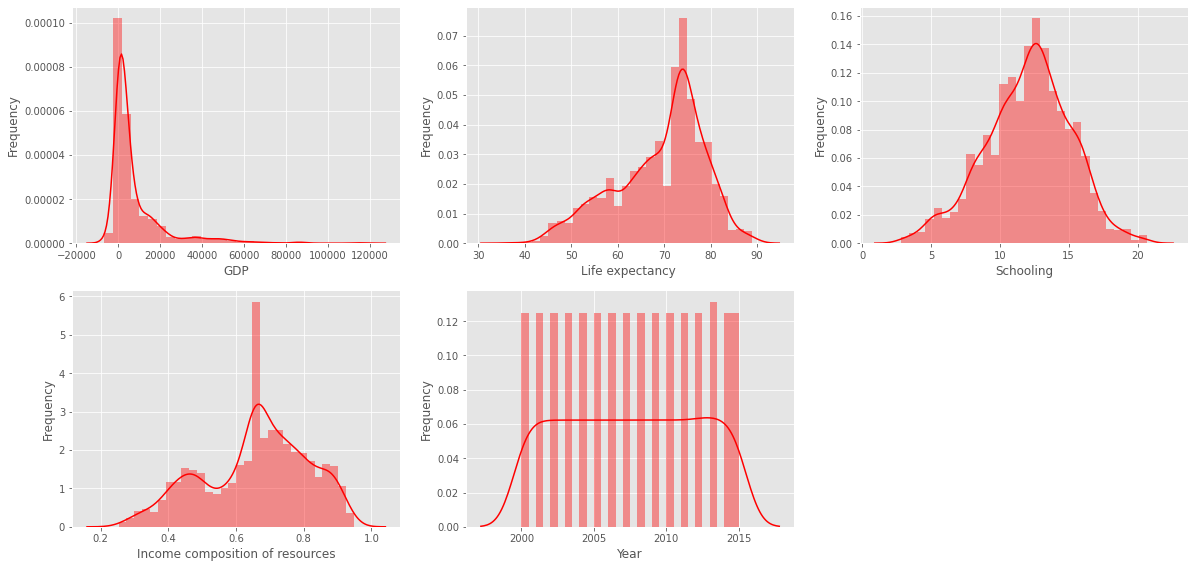

In [ ]:
plt.figure(figsize=(20, 20))

for e, column in enumerate(['GDP','Life expectancy ', "Schooling", "Income composition of resources", "Year"]):
    plt.subplot(4, 3, e + 1)
    sns.distplot(df[column],bins=30,color="r")
    plt.ylabel('Frequency')

__Observation:__ <br /> The plot above demonstrates that GDP is highly skewed and life expectancy is slightly skewed. The schooling variable has a nearly normal distribution.

#### Correlation Heatmap

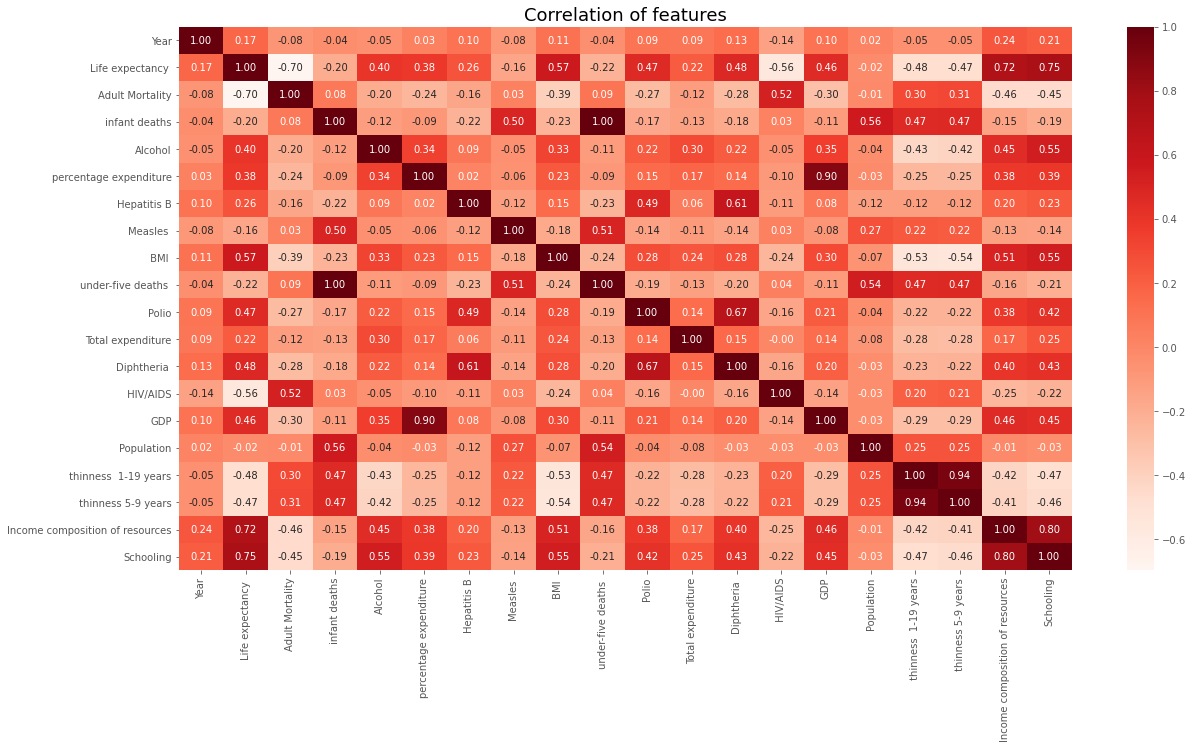

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt = '.2f')
plt.title("Correlation of features", fontsize = 18)
plt.show()

**Observation**: <br />


1.   **GDP and Life Expectancy:** r = 0.46 moderate positive correlation
2.   **Schooling and Life Expectancy:** r = 0.75 strong positive correlation
3.   **Income Composition of Resources:** r = 0.72 strong positive correlation







#### Function to compute 95% Confidence Interval

In [ ]:
# Defining 95% confidence interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean

    import math
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = abs(mean_difference - margin_of_error)
    ci_upper = abs(mean_difference + margin_of_error)
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

#### Look at the relationship between GDP and life expectancy across all countries.

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy '>

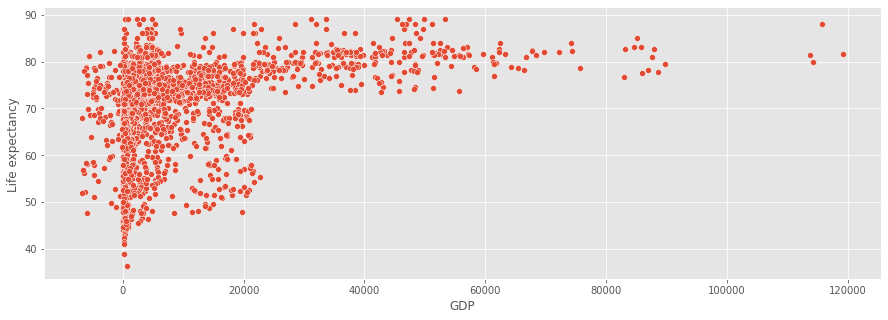

In [ ]:
fig=plt.figure(figsize=(15,5))

sns.scatterplot(x = "GDP", y = "Life expectancy ", data = df)

In [ ]:
# Defining two sample populations for t-test
df_gdp_higher = df.loc[(df['GDP'] > df["GDP"].mean()).values] 

df_gdp_lower = df.loc[(df['GDP'] < df['GDP'].mean()).values]

In [ ]:
ttest_retail = stats.ttest_ind(df_gdp_higher['Life expectancy '], df_gdp_lower['Life expectancy '])
s, p = ttest_retail
print("Result: ")
if p <= 0.05:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")
    
print(ttest_retail)

Result: 
Dependent (reject H0)
Ttest_indResult(statistic=20.026817196553452, pvalue=9.81675454078047e-84)


In [ ]:
# Plugging in Hypothesis 2 sample populations and t-test
ci_life_expectancy = get_95_ci(df_gdp_higher['Life expectancy '], df_gdp_lower['Life expectancy '])
print('Life expectancy and GDP: ' + ci_life_expectancy)

Life expectancy and GDP: The difference in means at the 95% confidence interval (two-tail) is between 8.176050357019108 and 6.829239101506261.


__Inference:__ The p-value of less than 0.05 demonstrates that GDP has a significant impact on people's life expectancies worldwide.

### Look at the relationship between education and life expectancy.


<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy '>

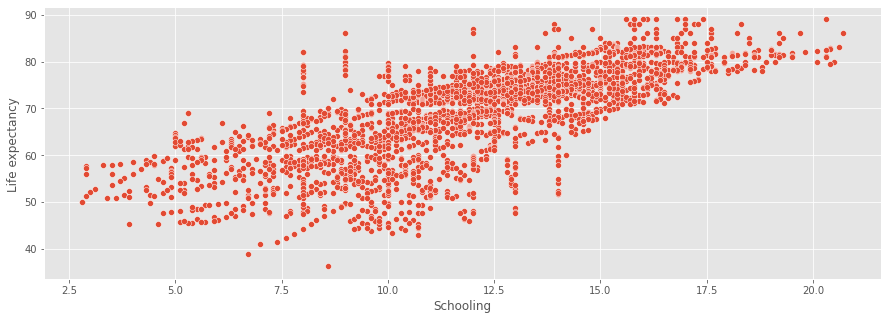

In [ ]:
fig=plt.figure(figsize=(15,5))

sns.scatterplot(x = "Schooling", y = "Life expectancy ", data = df)

In [ ]:
# Defining two sample populations for t-test
df_higher_ed = df.loc[(df['Schooling'] > df['Schooling'].mean()).values] 

df_lower_ed = df.loc[(df['Schooling'] < df['Schooling'].mean()).values]

In [ ]:
ttest_retail = stats.ttest_ind(df_higher_ed['Life expectancy '], df_lower_ed['Life expectancy '])
s, p = ttest_retail
print("Result: ")
print(ttest_retail)
if p <= 0.05:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

Result: 
Ttest_indResult(statistic=44.89132663865705, pvalue=0.0)
Dependent (reject H0)


In [ ]:
# Plugging in Hypothesis 2 sample populations and t-test
ci_education = get_95_ci(df_higher_ed['Life expectancy '], df_lower_ed['Life expectancy '])
print('Life expectancy and education: ' + ci_education)

Life expectancy and education: The difference in means at the 95% confidence interval (two-tail) is between 12.69290288386774 and 11.60981277234652.


__Inference:__ The p-value of less than 0.05 indicates that education significantly affects life expectancy across all countries.

### Look at the relationship between income composition of resources and life expectancy across all countries.


<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy '>

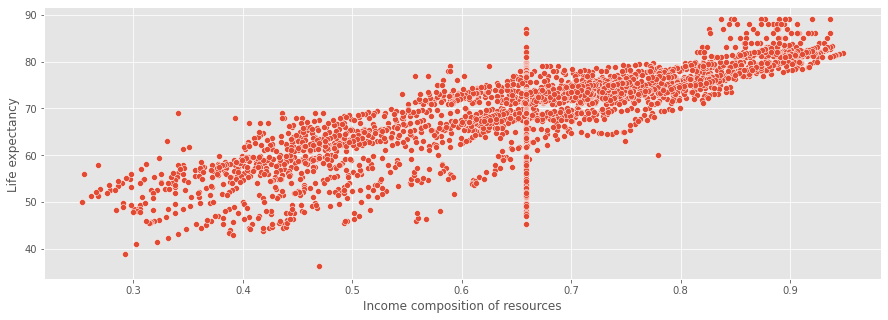

In [ ]:
fig=plt.figure(figsize=(15,5))
sns.scatterplot(x = "Income composition of resources", y = "Life expectancy ", data = df)

In [ ]:
# Defining two sample populations for t-test
ICR_mean = df['Income composition of resources'].mean()

df_higher = df.loc[(df['Income composition of resources'] > ICR_mean).values] 

df_lower = df.loc[(df['Income composition of resources'] < ICR_mean).values]

In [ ]:
ttest_retail = stats.ttest_ind(df_higher['Life expectancy '], df_lower['Life expectancy '])
s, p = ttest_retail
print("Result: ")
print(ttest_retail)
if p <= 0.05:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

Result: 
Ttest_indResult(statistic=44.140450464387065, pvalue=0.0)
Dependent (reject H0)


In [ ]:
# Plugging in Hypothesis 2 sample populations and t-test
ci_ICR = get_95_ci(df_higher['Life expectancy '], df_lower['Life expectancy '])
print('Life expectancy and income composition of resources: ' + ci_ICR)

Life expectancy and income composition of resources: The difference in means at the 95% confidence interval (two-tail) is between 12.85809657557719 and 11.73751004907017.


__Inference:__ The scatterplot above demonstrates that life expectancy rises as resources' income composition changes. A p-value of less than 0.05 indicates a significant change in life expectancy as a result of changing values for the composition of income.

### How does life expectancy change over time?


<AxesSubplot:xlabel='Year', ylabel='Life expectancy '>

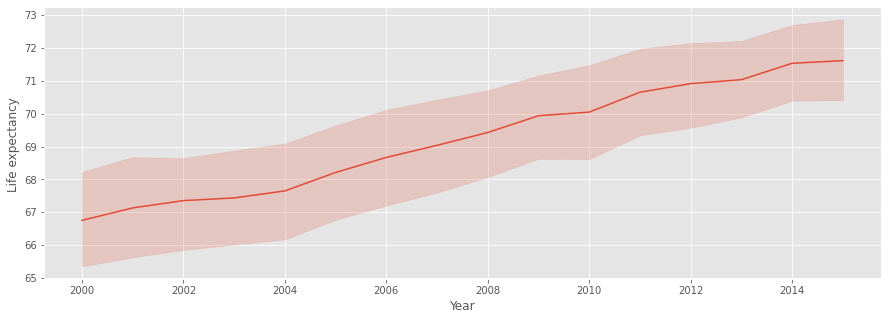

In [ ]:
fig=plt.figure(figsize=(15,5))
sns.lineplot(x = "Year", y = "Life expectancy ", data = df)

In [ ]:
df['Life_expectancy'] = df['Life expectancy ']

__Observation:__ Overall life expectancy has trended up from 2000-2015. 

### Relationship of developed and developing states with life expectancy

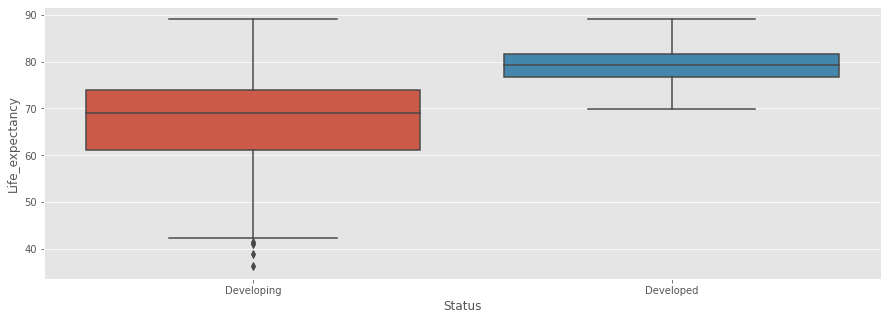

In [ ]:
fig=plt.figure(figsize=(15,5))

sns.boxplot(x = "Status", y="Life_expectancy", data=df);

In [ ]:
# Defining two sample populations for t-test
df_st_developing = df.loc[(df['Status'] == "Developing").values] 

df_st_developed = df.loc[(df['Status'] == "Developed").values]

In [ ]:
ttest_retail = stats.ttest_ind(df_st_developing['Life expectancy '], df_st_developed['Life expectancy '])
s, p = ttest_retail
print("Result: ")
print(ttest_retail)
if p <= 0.05:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

Result: 
Ttest_indResult(statistic=-29.81638446105603, pvalue=6.990894457933641e-171)
Dependent (reject H0)


__Inference:__ The p-values of less than 0.05 demonstrate a substantial difference in life expectancy between developed and developing states across all states.

## **Conclusion**



*   GDP, Schooling, Income Composition of Resources, and Status seem to have significant impact on life expectancy. <br/><br/>
* Life expectancy has improved drastically over the course of time and may continue to do so as countries climb the ranks in their economy, health care, and other social components.<br/><br/>
*   Developing countries can work to improve their resources to help improve these key factors to improve life expectancy and quality of life.<br/><br/>
* Developed countries can still improve different social factors in order to maintain or improve life expectancy further.<br/><br/>
*Life expectancy can ultimately help countries plan for the future.
